In [261]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#**Problema 1**

**1)** Implementar un reloj donde una flecha sea el minutero y otra el segundero, y que al dar la hora (min,seg) este ponga las flechas en el lugar indicado.

---

#**Solucion**

Podemos pensar en las manecillas de un reloj como vectores que se orientan con cierta elevación $\theta$

Matricialmente podemos tratar esto con ayuda de la matriz de rotacion

$$A = \begin{equation}
\begin{vmatrix}
cos(\theta) & -cos(\theta)\\
sin(\theta) & cos(\theta)\\
\end{vmatrix}
\end{equation}$$

La posición $\vec{r}$ del minutero y el segundero será una transformación del tipo

$$\vec{r(\theta)} = A\vec{r(0)}$$

Donde $\vec{r(0)}$ será la posición inicial de las manecillas cuando marcan las $12$

In [22]:
def matriz_rotacion(theta): #Matriz de rotacion
  return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

def hora(min, sec):
  theta = 2*np.pi/60 #Particiones de la circunferencia del reloj entre 60
  vmin = np.array([0,2]) #Vector del minutero
  vsec = np.array([0,1]) #Vector del segundero
  minute = np.matmul(matriz_rotacion(theta*-min), vmin) #Vector Posicion del minutero con giro horario
  seconds = np.matmul(matriz_rotacion(theta*-sec), vsec) #Vector Posicion del secundero con giro horario
  return minute, seconds #Retorna los vectores posicion del minutero y segundero como un array de coordenadas (X,Y)

(-5.0, 5.0, -5.0, 5.0)

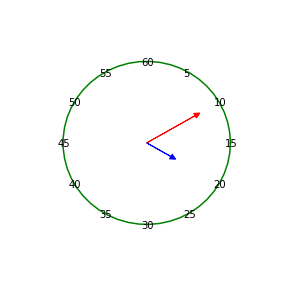

In [82]:
minute, seconds = hora(10,20) #La hora ingresada puede ser cambiada a conveniencia
plt.figure(figsize = (5,5))
plt.arrow(0, 0, minute[0], minute[1], head_width=0.2, head_length=0.2, fc='r', ec='r', label = "Minutes") #Vector del minutero
plt.arrow(0, 0, seconds[0], seconds[1], head_width=0.2, head_length=0.2, fc='b', ec='b', label = "Seconds") #Vector del segundero

#Decoración del Reloj
for i in range(12, 0, -1):
  plt.text(-3*np.cos(i*30*np.pi/180 + np.pi/2) - 0.2,3*np.sin(i*30*np.pi/180 + np.pi/2) -0.15,str(i*5), fontsize=10, color='black') #
plt.plot(3*np.cos(np.linspace(0, 2*np.pi)), 3*np.sin(np.linspace(0, 2*np.pi)), color = "green") #Circunferencia del Reloj
plt.ylim(-5,5)
plt.xlim(-5,5)
plt.axis("off")

#**Problema 2**

**2)** Sobre una barra estática de longitud 3.70m actuan 4 fuerzas, en un extremo $F_0=926$N con ángulo de $90^\circ$, $F_1$  se aplica en el otro extremo con ángulo de $69.3^\circ$, $F_2$ se aplica a una distancia de $1.50$m del primer extremo con ángulo de $251.1^\circ$, y $F_3$ se aplica distancia de $2.60$m del otro extremo con ángulo de $303.4^\circ$.

a) Hacer el diagrama de fuerzas y demuestre que la suma de fuerzas y torques da las ecuaciones:<br>

Suma de fuerzas verticales:

$$F_1 \text{sen}\,69.3° − F_2\text{sen}\,71.1° − F_3 \text{sen}\,56.6° + 926 = 0,$$

suma de fuerzas horizontales:

$$F_1 \cos 69.3° − F_2 \cos 71.1° + F_3 \cos 56.6° = 0,$$

torques:

$$7.80F_1\text{sen}\,69.3° − 1.50F_2 \text{sen}\,71.1° − 5.20 F_3\text{sen}\,56.6° = 0.$$

**b**) Use python calcular las fuerzas $F_1, F_2, F_3$. <br>
**c**) Variar el ángulo de $F_0$ de $0$ a $180^\circ$ y graficar $F_1, F_2, F_3$ como función del ángulo.<br>
**d**) Agrege tres fuerzas más con diferentes ángulos y a puntos diferentes y repita los pasos anteriores. 

---

#**Solucion**

En este problema tenemos un sistema de $3$ ecuaciones, los cuales podemos solucionar con diferentes metodos matriciales.

Sea $A$ una matriz que está compuesta por el sistema de ecuaciones lineales y $b$ un vector con el valor resultante de las ecuaciones. La solución $x$ a este sistema será con una reducción de la matriz aumentada de $A$ y $b$, donde $x$ es un vector que contiene las magnitudes de las fuerzas.

$$Ax=b$$

Para que nuestra solución se correcta, se debe cumplir la condicion $Ax-b=0$



In [324]:
theta_1 = 69.3*np.pi/180; theta_2 = 71.1*np.pi/180; theta_3 = 56.6*np.pi/180 
A = np.array([[np.sin(theta_1), -np.sin(theta_2), -np.sin(theta_3)], 
              [np.cos(theta_1), -np.cos(theta_2), np.cos(theta_3)], 
              [7.8*np.sin(theta_1), -1.5*np.sin(theta_2), -5.2*np.sin(theta_3)]]) #Matriz del Sistema de Ecuaciones
b = np.array([-926,0,0]) #Vector solucion
fuerzas = np.linalg.solve(A, b) #Solucion del Sistema con la matriz aumentada
pd.DataFrame(fuerzas, index = ["F1", "F2", "F3"], columns = ["F(N)"]) #Magnitudes de las fuerzas

,F(N)
F1,425.536440
F2,1079.906456
F3,362.199928


In [304]:
A@fuerzas - b #Comprobacion de la solucion
#Los valores tienden a 0 por errores en aproximacion computacional

array([1.13686838e-13, 0.00000000e+00, 2.27373675e-13])

Text(0.85, 0.02, '2.60 m')

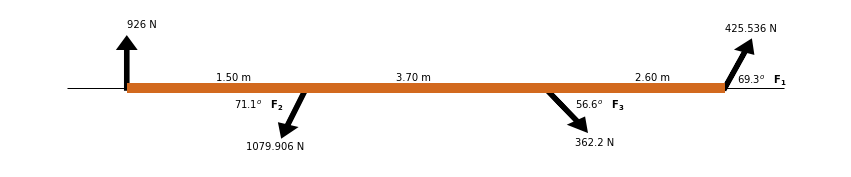

In [325]:
#Graficacion de la solucion

F = .1 # factor de escala para flechas (fuerzas).
plt.figure(figsize=(15, 3))
plt.xlim(-.2,1.2)
plt.ylim(-.2,.2)
plt.axis('off') # remover axis, (lineas con números en ejes  x, y)

# Barra 
plt.hlines(0,-.1,1.1,color="k",lw=1) # sistema de referencia
plt.hlines(0,1,0,color="chocolate",lw=10) # Barra
# Fuerza F0 
plt.arrow(0, 0, 0, F, head_width=0.02, head_length=.02, fc='k', ec='k',lw=5)
plt.text(.0, 0.15, "926 N")
# Fuerza F1
plt.arrow(1,0, F*np.cos(theta_1), F*np.sin(theta_1), head_width=0.02, head_length=.02, fc='k', ec='k',lw=5)
plt.text(1.02, 0.01, r"69.3$^o\quad\bf F_1$")
plt.text(1, 0.14, str(np.round(fuerzas[0], decimals = 3))+" N")
# Fuerza F2
plt.arrow(0.3, 0,-F*np.cos(theta_2), -F*np.sin(theta_2), head_width=0.02, head_length=.02, fc='k', ec='k',lw=5)
plt.text(0.18, -0.05, r"71.1$^o\quad\bf F_2$")
plt.text(0.2, -0.15, str(np.round(fuerzas[1], decimals = 3))+" N")
#Fuerza F3
plt.arrow(0.7, 0,F*np.cos(theta_3), -F*np.sin(theta_3), head_width=0.02, head_length=.02, fc='k', ec='k',lw=5)
plt.text(.75, -0.05, r"56.6$^o\quad\bf F_3$")
plt.text(0.75, -0.14, str(np.round(fuerzas[2], decimals = 3))+" N")

# Distancias torques
plt.text(.15, 0.02, "1.50 m")
plt.text(.45, 0.02, "3.70 m")
plt.text(.85, 0.02, "2.60 m")

In [322]:
def fuerzas(theta): #Funcion que varia el angulo de F0 y soluciona las magnitudes de las demás fuerzas
  A = np.array([[np.sin(theta_1), -np.sin(theta_2), -np.sin(theta_3)], [np.cos(theta_1), -np.cos(theta_2), np.cos(theta_3)], [7.8*np.sin(theta_1), -1.5*np.sin(theta_2), -5.2*np.sin(theta_3)]]) #Matriz de fuerzas
  b = np.array([-926*np.sin(theta),-926*np.cos(theta),0])
  return np.linalg.solve(A, b)

theta = np.linspace(0, np.pi, 6) #Varios angulos para F0
Fs = np.zeros((3,6)) #Matriz que contendrá las distintas soluciones al sistema
for i in range(6):
  Fs[:,i] = fuerzas(theta[i])

pd.DataFrame(Fs, index = ["F1", "F2", "F3"], columns = ["0°", "36°", "72°", "108°", "144°", "180°"]) #Magnitudes de las fuerzas para diferentes angulos de F0

,0°,36°,72°,108°,144°,180°
F1,-568.523947,-209.821491,229.025643,580.392765,710.069578,568.523947
F2,395.009802,954.322731,1149.116814,904.987330,315.183446,-395.009802
F3,-1084.671067,-664.621550,9.290809,679.654395,1090.413102,1084.671067


Text(0.85, 0.02, '2.60 m')

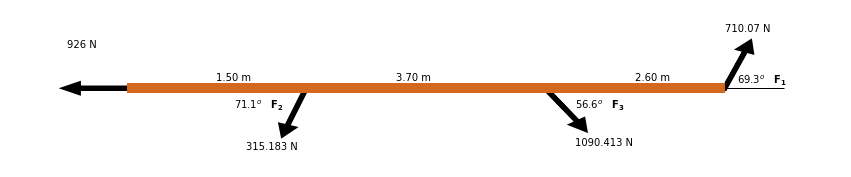

In [329]:
#Graficacion de una solucion con Theta en F0 igual a 144°

F = .1 # factor de escala para flechas (fuerzas).
plt.figure(figsize=(15, 3))
plt.xlim(-.2,1.2)
plt.ylim(-.2,.2)
plt.axis('off') # remover axis, (lineas con números en ejes  x, y)

# Barra 
plt.hlines(0,-.1,1.1,color="k",lw=1) # sistema de referencia
plt.hlines(0,1,0,color="chocolate",lw=10) # Barra
# Fuerza F0 
plt.arrow(0, 0, F*np.cos(theta[4]), F*np.sin(theta[5]), head_width=0.02, head_length=.02, fc='k', ec='k',lw=5)
plt.text(-0.1, 0.1, "926 N")
# Fuerza F1
plt.arrow(1,0, F*np.cos(theta_1), F*np.sin(theta_1), head_width=0.02, head_length=.02, fc='k', ec='k',lw=5)
plt.text(1.02, 0.01, r"69.3$^o\quad\bf F_1$")
plt.text(1, 0.14, str(np.round(Fs[0][4], decimals = 3))+" N")
# Fuerza F2
plt.arrow(0.3, 0,-F*np.cos(theta_2), -F*np.sin(theta_2), head_width=0.02, head_length=.02, fc='k', ec='k',lw=5)
plt.text(0.18, -0.05, r"71.1$^o\quad\bf F_2$")
plt.text(0.2, -0.15, str(np.round(Fs[1][4], decimals = 3))+" N")
#Fuerza F3
plt.arrow(0.7, 0,F*np.cos(theta_3), -F*np.sin(theta_3), head_width=0.02, head_length=.02, fc='k', ec='k',lw=5)
plt.text(.75, -0.05, r"56.6$^o\quad\bf F_3$")
plt.text(0.75, -0.14, str(np.round(Fs[2][4], decimals = 3))+" N")

# Distancias torques
plt.text(.15, 0.02, "1.50 m")
plt.text(.45, 0.02, "3.70 m")
plt.text(.85, 0.02, "2.60 m")

#**Problema 3**

**3)** Considere tres tanques conectados en forma serial y $x_1(t),x_2(t)$ y $x_3(t)$ la cantidad de sal al tiempo $t$ en cada tanque, si se agrega agua pura al primer tanque entonces la concentración de sal disminuye, por valance químico se obtienen las siguientes ecuaciones 

$$
\begin{matrix}
x_1' &=& -\frac{1}{2}x_1, \\
x_2' &=& \frac{1}{2}x_1-\frac{1}{4}x_2, \\
x_3' &=& \frac{1}{4}x_2-\frac{1}{6}x_3.
\end{matrix}
$$

**a**) Use python para diagonalizar $A$ y use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $\mathbf{r}(t)=(x_1(t),x_2(t),x_3(t))$ en el intervalo de tiempo $[0,2]$. Grafique $x_1(t),x_2(t),x_3(t)$ (use la condición inicial $\mathbf{r}(0)=(0.9,0.5,0.1))$.<br> 
**b**) Calcule los tiempos para los cuales las concentraciones en cada tanque es menor de 0.1%. <br>
**c**) Grafique el tiempo para cual la concentración en el tanque tres es menor o igual a 0.1% como función de $x_1(0)$ que toma valores en el intervalo $(0<x_1(0)<1)$.<br>
**d**) Compare los resultados de a) y c) con la solución analítica:<br>

$$
\begin{align}
x_1(t) &= x_1(0)e^{−t/2},\\
x_2(t) &= −2x_1(0)e^{−t/2} + (x_2(0) + 2x_1(0))e^{−t/4},\\
x_3(t) &=\frac{3}{2}x_1(0)e^{−t/2} − 3(x_2(0) + 2x_1(0))e^{−t/4}\\ 
       & + (x_3(0) −\frac{3}{2}x_1(0) + 3(x_2(0) + 2x_1(0)))e^{−t/6}.\\
\end{align}
$$
**e**) Solucione por rk4 y grafique el error absoluto. 

---

#**Solucion**

Ante este problema estamos frente a un sistema de ecuaciones diferenciales. Se puede demostrar que la solucion a este sistema es de forma matricial

$$r'=Ar$$

$$r(t)=e^{At}r(0)$$

Para conocer la operacion $e^{At}$ debemos diagonalizar la matriz $A$ y efectuar la operación exponencial a su matriz diagonal correspondiente

In [90]:
import scipy.linalg as sc #Libreria para diagonalizacion

In [142]:
A = np.matrix([[-0.5,0,0],[0.5,-0.25,0],[0,0.5,-1/6]]) #Matriz Derivada
e, U = sc.eig(A) #Autovalores y Autovectores de A
D = np.asmatrix(np.diag(e, 0)) #Matriz Diagonal de Autovalores

U@D@np.linalg.inv(U) == A #Comprobación de la diagonalización
#La entrada A31 tiene error de aproximacion

In [294]:
dt = 0.001 #Tamaño de paso de tiempo
t = np.arange(0, 2 + dt, dt) #Array de Tiempo
r0 = np.array([0.9, 0.5, 0.1]) #Condicion inicial
rt = np.zeros((3,len(t))) #Matriz que guardará los niveles de concentracion en cada tanque

for i in range(len(t)): # Concentracion en los tanques en cada instante de tiempo
  expD = np.diag(np.exp(e*t),0)
  rt[:,i] = (U@expD@np.linalg.inv(U)) @ r0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


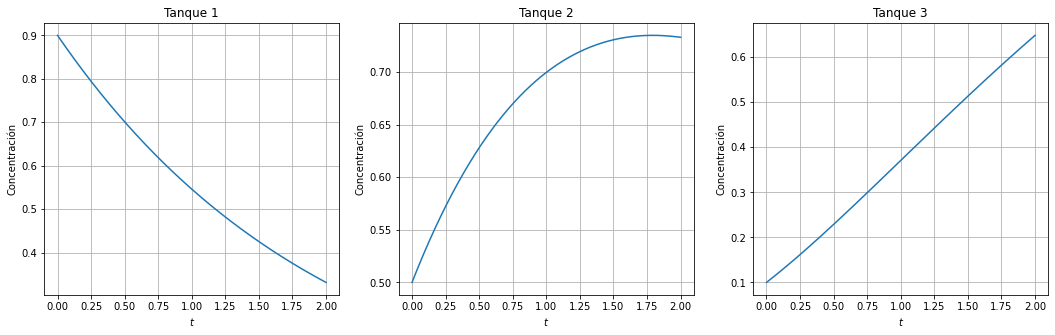

In [296]:
#Concentracion en cada tanque en funcion del tiempo por la solucion matricial

fig = plt.figure(figsize = (18,5))
#Tanque 1
ax1 = fig.add_subplot(131)
ax1.plot(t,rt[0])
ax1.set_title("Tanque 1")
ax1.set_xlabel("$t$")
ax1.set_ylabel("Concentración")
ax1.grid()
#Tanque 2
ax2 = fig.add_subplot(132)
ax2.plot(t,rt[1])
ax2.set_title("Tanque 2")
ax2.set_xlabel("$t$")
ax2.set_ylabel("Concentración")
ax2.grid()
#Tanque 3
ax3 = fig.add_subplot(133)
ax3.plot(t,rt[2])
ax3.set_title("Tanque 3")
ax3.set_xlabel("$t$")
ax3.set_ylabel("Concentración")
ax3.grid()

In [172]:
#Funciones Analiticas de Concentracion en tanques
def x1(x1_0, t):
  return x1_0*np.exp(-t/2)

def x2(x1_0, x2_0, t):
  return -2*x1_0*np.exp(-t/2) + (x2_0 + 2*x1_0)*np.exp(-t/4)

def x3(x1_0, x2_0, x3_0, t):
  return 1.5*x1_0*np.exp(-t/2) - 3*(x2_0 + 2*x1_0)*np.exp(-t/4) + (x3_0 - 1.5*x1_0 + 3*(x2_0 + 2*x1_0))*np.exp(-t/6)

In [173]:
#Valores analiticos de la concentracion
x1s_analitico = x1(r0[0], t)
x2s_analitico = x2(r0[0], r0[1], t)
x3s_analitico = x3(r0[0], r0[1], r0[2], t)

In [174]:
#Sistema de ecuaciones diferenciales
def g0(x1, x2, x3, t):
  return -0.5*x1

def g1(x1, x2, x3, t):
  return 0.5*x1 - 0.25*x2

def g2(x1, x2, x3, t):
  return 0.25*x2 - (1/6)*x3

In [175]:
#Algoritmo iterado Runge - Kutta 4to Orden
def RK4(f, y, t, dt): #Recibe un valor y_i
  k1 = dt*f(y,t)
  k2 = dt*f(y + 0.5*k1, t + 0.5*dt)
  k3 = dt*f(y + 0.5*k2, t + 0.5*dt)
  k4 = dt*f(y + k3, t + dt)
  return y + (1/6)*(k1 + 2*k2 + 2*k3 + k4) #Retorna el valor y_i+1

In [181]:
#Integrador que se incorpora a Runge - Kutta
def integrador(y,t):
  f1 = y[0]
  f2 = y[1]
  f3 = y[2]

  df1 = g0(f1, f2, f3, t)
  df2 = g1(f1, f2, f3, t)
  df3 = g2(f1, f2, f3, t)

  f = np.array([df1, df2, df3])
  return f

In [182]:
#Arrays para valores de las concentraciones en cada tanque
x1s_rk = np.zeros(len(t))
x2s_rk = np.zeros(len(t))
x3s_rk = np.zeros(len(t))

#Condiciones Iniciales
x1s_rk[0] = r0[0]
x2s_rk[0] = r0[1]
x3s_rk[0] = r0[2]

y = r0
for i in range(len(t)-1): #Ejecución de Runge - Kutta paso a paso
  y = RK4(integrador, y, t[i], dt)
  #Se guardan los valores obtenidos
  x1s_rk[i+1] = y[0]
  x2s_rk[i+1] = y[1]
  x3s_rk[i+1] = y[2]

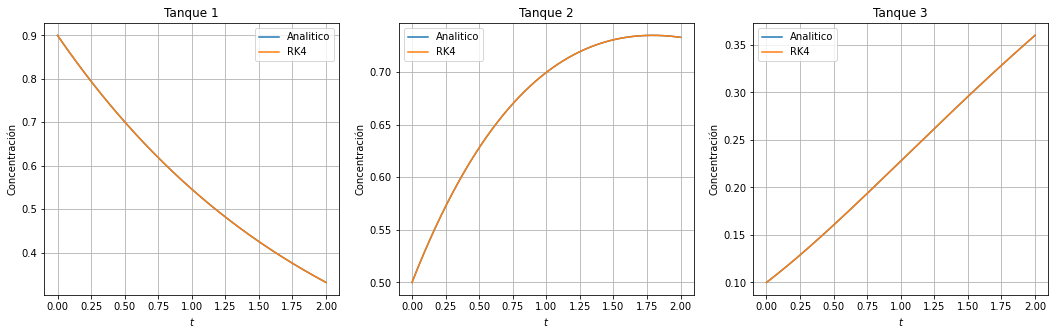

In [188]:
#Comparacion entre los valores analiticos y los obtenidos por Runge - Kutta
#Notese que las curvas se encuentran una encima de otra por lo que hay una excelente aproximacion

fig = plt.figure(figsize = (18,5))
#Tanque 1
ax1 = fig.add_subplot(131)
ax1.plot(t,x1s_analitico, label = "Analitico")
ax1.plot(t, x1s_rk, label = "RK4")
ax1.set_title("Tanque 1")
ax1.set_xlabel("$t$")
ax1.set_ylabel("Concentración")
ax1.grid()
ax1.legend()
#Tanque 2
ax2 = fig.add_subplot(132)
ax2.plot(t,x2s_analitico, label = "Analitico")
ax2.plot(t, x2s_rk, label = "RK4")
ax2.set_title("Tanque 2")
ax2.set_xlabel("$t$")
ax2.set_ylabel("Concentración")
ax2.grid()
ax2.legend()
#Tanque 3
ax3 = fig.add_subplot(133)
ax3.plot(t,x3s_analitico, label = "Analitico")
ax3.plot(t, x3s_rk, label = "RK4")
ax3.set_title("Tanque 3")
ax3.set_xlabel("$t$")
ax3.set_ylabel("Concentración")
ax3.grid()
ax3.legend()

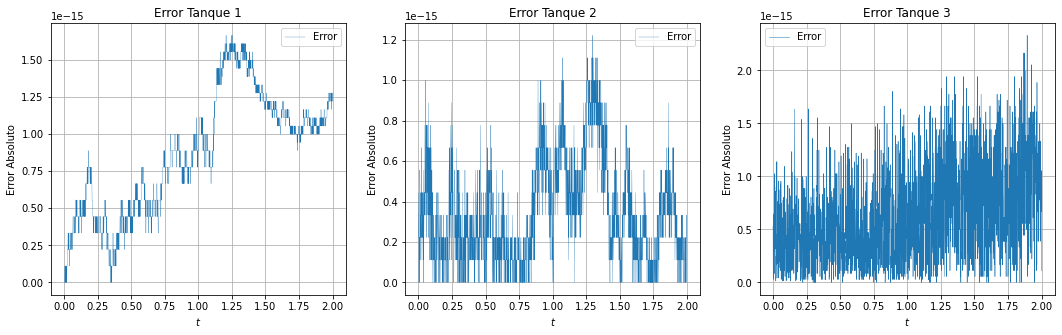

In [301]:
#Error entre los valores analiticos y los integrados
#Note la excelente aproximacion por valores tan pequeños en el error

fig = plt.figure(figsize = (18,5))
#Tanque 1
ax1 = fig.add_subplot(131)
ax1.plot(t,np.abs(x1s_analitico - x1s_rk), label = "Error", linewidth = 0.3)
ax1.set_title("Error Tanque 1")
ax1.set_xlabel("$t$")
ax1.set_ylabel("Error Absoluto")
ax1.grid()
ax1.legend()
#Tanque 2
ax2 = fig.add_subplot(132)
ax2.plot(t,np.abs(x2s_analitico - x2s_rk), label = "Error", linewidth = 0.3)
ax2.set_title("Error Tanque 2")
ax2.set_xlabel("$t$")
ax2.set_ylabel("Error Absoluto")
ax2.grid()
ax2.legend()
#Tanque 3
ax3 = fig.add_subplot(133)
ax3.plot(t,np.abs(x3s_analitico - x3s_rk), label = "Error", linewidth = 0.5)
ax3.set_title("Error Tanque 3")
ax3.set_xlabel("$t$")
ax3.set_ylabel("Error Absoluto")
ax3.grid()
ax3.legend()

#**Problema 4**

**4)** El sistema de *Hénon–Heiles* es ampliamente estudiado en caos y fue descubierto en 1962 por Michel Hénon y Carl Heiles, el sistema describe el movimiento no lineal de una estrella alrededor de un centro galáctico con el movimiento restringido a un plano, se define por las ecuaciones de Newton,

$$
\begin{eqnarray}
m\frac{d^2x}{dt^2}&=&-x-2 xy,\\
m\frac{d^2y}{dt^2}&=&-y-x^{2}+y^{2}.
\end{eqnarray}
$$
y energía potencial,

$$
V(x,y)={\frac {1}{2}}(x^{2}+y^{2})+ x^{2}y-{\frac {y^{3}}{3}}.
$$

si $m=1$, resuelva el sistema con rk4, grafique $(y,v_y)$ acorde al nivel de energía dada $E=1/8$ y $x=0$, que da las condiciones iniciales:<br>
**a**) Órbita regular  $x(0)=0$, $y(0)=0.55$ y $v_x=0.2417$.<br> 
**b**) Órbita caótica muy difusa $x(0)=0$, $y(0)=−0.016$, $v_x=0.49974$ y $v_y=0.$ <br>
**c**) Órbita caótica no muy difusa $x(0)=0$, $y(0)=−0.01344$, $v_x=0.49982$ y $v_y=0.$<br>

---

#**Solución**

In [3]:
#Sistema de ecuaciones
def g0(x, y, vx, vy, t):
  return vx

def g1(x, y, vx, vy, t):
  return - x - 2*x*y

def g2(x, y, vx, vy, t):
  return vy

def g3(x, y, vx, vy, t):
  return - y - x**2 + y**2

In [5]:
#Funcion que se incorpora a Runge - Kutta
def integrador(y, t):
  fx = y[:,0]
  fvx = y[:,1]
  fy = y[:,2]
  fvy = y[:,3]

  dx = g0(fx, fy, fvx, fvy, t)
  dvx = g1(fx, fy, fvx, fvy, t)
  dy = g2(fx, fy, fvx, fvy, t)
  dvy = g3(fx, fy, fvx, fvy, t)

  f = np.c_[dx, dvx, dy, dvy]
  return f

In [6]:
#Array de Tiempo
dt = 0.1
t = np.arange(0, 150 + dt, dt)

#Listas donde se almacenarán los valores al correr Runge - Kutta
x_pos = np.zeros((3, len(t)))
y_pos = np.zeros((3, len(t)))
vx = np.zeros((3, len(t)))
vy = np.zeros((3, len(t)))

#Condiciones iniciales
vx[:,0] = np.array([0.2417, 0.49974, 0.49982])
y_pos[:,0] = np.array([0.55, -0.016, -0.01344])

y = np.c_[x_pos[:,0], vx[:,0], y_pos[:,0], vy[:,0]]

for i in range(len(t)-1): #Ejecucion de Runge - Kutta paso a paso
  y = RK4(integrador, y, t[i], dt)
  #Se guardan los valores obtenidos paso a paso
  x_pos[:,i+1] = y[:,0]
  vx[:,i+1] = y[:,1]
  y_pos[:,i+1] = y[:,2]
  vy[:,i+1] = y[:,3]

Text(0, 0.5, '$\\dot{y}$')

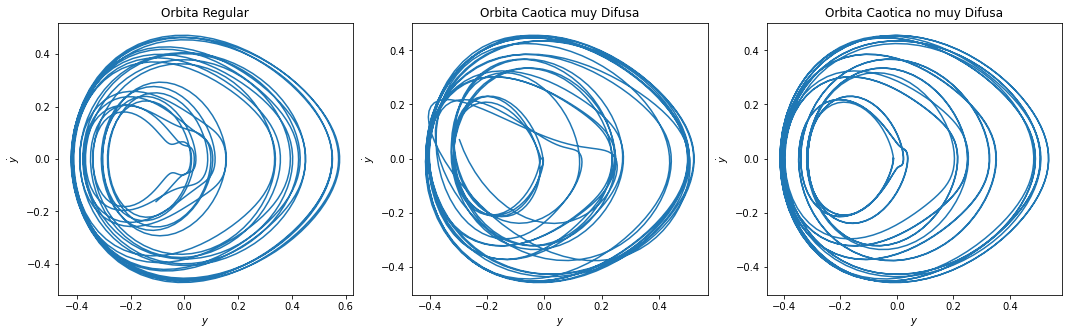

In [28]:
fig = plt.figure(figsize = (18,5))
#Orbita Regular
ax1 = fig.add_subplot(131)
ax1.plot(y_pos[0],vy[0])
ax1.set_title("Orbita Regular")
ax1.set_xlabel("$y$")
ax1.set_ylabel("$\\dot{y}$")
#Orbita Caotica muy Difusa
ax2 = fig.add_subplot(132)
ax2.plot(y_pos[1],vy[2])
ax2.set_title("Orbita Caotica muy Difusa")
ax2.set_xlabel("$y$")
ax2.set_ylabel("$\\dot{y}$")
#Orbita Caotica no muy Difusa
ax3 = fig.add_subplot(133)
ax3.plot(y_pos[2],vy[2])
ax3.set_title("Orbita Caotica no muy Difusa")
ax3.set_xlabel("$y$")
ax3.set_ylabel("$\\dot{y}$")

#**Problema 5**

**5)** **a**) Implemente el método de Von Neumann para generar una distribución gaussiana y compare a los métodos anteriores (teorema central y el método de Box-Muller).<br>

---

#**Solucion**

In [21]:
# Método de Von Neumann
def von_neumann(M, f): #Parametros M repeticiones y f la función de Distribucion Gaussiana
  w = 0.4 #Altura Maxima para la funcion de Distribución Gaussiana 
  r = np.random.rand(M)*8 - 4 #Genera "r" en el intervalo [-4,4] Sigmas
  y = w*np.random.rand(M) #Genera "y" en el intervalo [0,w]
  h = np.array([]) #Array donde se guardarán los valores aceptables
  for i in range(M): #Condicional de valores aceptables
    if y[i] <= f(r[i]): 
      h = np.append(h,r[i])
  return h  #Retorna los valores aceptables

#Metodo Box - Muller
def box_muller(M): #Función de Box Muller parametro de M valores
  r1 = np.random.random(M) #Dos distribuciones uniformes de datos
  r2 = np.random.random(M)
  z = np.sqrt(-2*np.log(r1))*np.cos(2*np.pi*r2) #Distribucion Gaussiana
  return z

#Metodo Teorema Central
def teorema_central(M, N):
  h = np.zeros(M) #Array que almacenará valores del histograma
  for i in range(M): 
    r = np.random.rand(N) #Genera N eventos con distribución uniforme
    y = np.sum(r) #Suma de eventos independientes
    h[i] = y #Guarda la suma de los eventos para histograma
  h = (h - np.mean(h))/np.std(h) #Estandarización de los datos
  return h #Retorna los valores del histograma

# Función de la distribución gaussiana
def gaussiana(x):
  return  np.exp(-(x**2)/2)/np.sqrt(2*np.pi)

Text(0.5, 1.0, 'Método de Box - Muller')

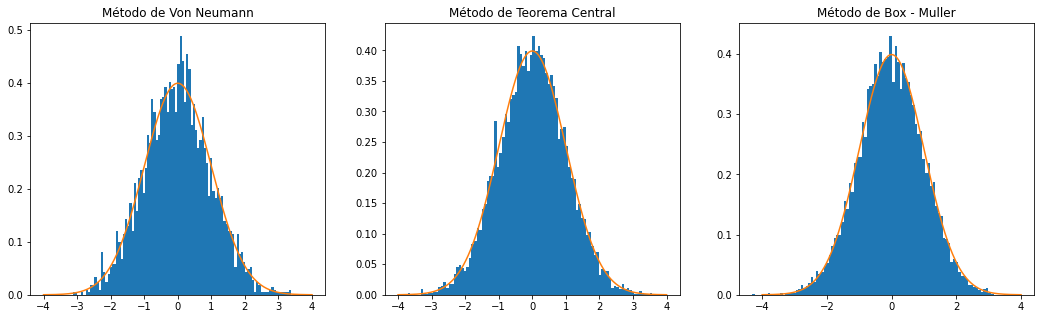

In [39]:
M = 10000
N = 1000
x = np.linspace(-4, 4, N)

#Histograma
fig = plt.figure(figsize = (18,5))
ax1 = fig.add_subplot(131)
ax1.hist(von_neumann(M, gaussiana), bins = 100, density = True)
ax1.plot(x,gaussiana(x)) #Curva de Distribucion Gaussiana
ax1.set_title('Método de Von Neumann')
ax2 = fig.add_subplot(132)
ax2.hist(teorema_central(M, N), bins = 100, density = True)
ax2.plot(x,gaussiana(x)) #Curva de Distribucion Gaussiana
ax2.set_title('Método de Teorema Central')
ax3 = fig.add_subplot(133)
ax3.hist(box_muller(M), bins = 100, density = True)
ax3.plot(x,gaussiana(x)) #Curva de Distribucion Gaussiana
ax3.set_title('Método de Box - Muller')

Ante las graficas obtenidas, podemos observar que el Método de Von Neumann arroja valores que logran sobrepasar el limite de la curva de distribución gaussiana, en comparación con los otros dos metodos. 

Si los graficos se generan en repetidas ocasiones, notaremos que los algoritmos de Limite Central y Box-Muller son aquellos cuyos valores no sobrepasan tanto la curva de distribución. Es dificil notar que algoritmo minimiza este efecto, sin embargo se nota una tendencia a que el algoritmo de Box-Muller genera mejores distribuciones de datos a l no sobrepasar en mayorias la curva.